### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Scenario
Turtle Games, a game manufacturer and retailer, manufactures and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Section 1)
- exploring the structure using decision trees (Section 2)
- exploring clusters in customer behaviour (Section 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Section 4)
- loading, transforming and visualising data in R (separate R script)
- statistical analysis and modelling in R (separate R script)

# Section 1: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. They have asked for assistance with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, it's necessary to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that the data set will require cleaning first.

## 1. Load and explore the data

In [101]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# For readability: Show two decimal places for all floating-point numbers
pd.set_option('display.precision', 2)

In [102]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv ("turtle_reviews.csv")

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [103]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [104]:
# Explore the data.
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [105]:
# Check for duplicates.
reviews.duplicated().sum()

np.int64(0)

In [106]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,39.49,48.08,50.00,1578.03,4320.52
std,13.57,23.12,26.09,1283.24,3148.94
min,17.00,12.30,1.00,25.00,107.00
25%,29.00,30.34,32.00,772.00,1589.25
50%,38.00,47.15,50.00,1276.00,3624.00
75%,49.00,63.96,73.00,1751.25,6654.00
max,72.00,112.34,99.00,6847.00,11086.00


## 2. Drop columns

In [107]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [108]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [109]:
# Create a CSV file as output.
reviews.to_csv('reviews_edit.csv', index=False)

In [110]:
# Import new CSV file with Pandas.
reviews_edit = pd.read_csv ("reviews_edit.csv")

# View DataFrame.
reviews_edit.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [111]:
# Define independent variable.
x = reviews_edit['spending_score']

# Define dependent variable.
y = reviews_edit['loyalty_points']

# Create model and print summary of metrics.
f = 'loyalty_points ~ spending_score'
test = ols(f, data = reviews_edit).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          2.92e-263
Time:                        11:55:39   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -75.0527     45.931     -1.634      0.102    -165.129      15.024
spending_score    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept        -75.05
spending_score    33.06
dtype: float64
Standard errors:  Intercept         45.93
spending_score     0.81
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [113]:
# Set the coefficient and the constant to generate the regression table
intercept = test.params['Intercept']
slope = test.params['spending_score']
y_pred = intercept + slope * x       

# View the output.
y_pred

0       1214.35
1       2602.94
2        123.32
3       2470.70
4       1247.42
         ...   
1995    2206.20
1996     189.44
1997    2933.56
1998     453.93
1999     189.44
Name: spending_score, Length: 2000, dtype: float64

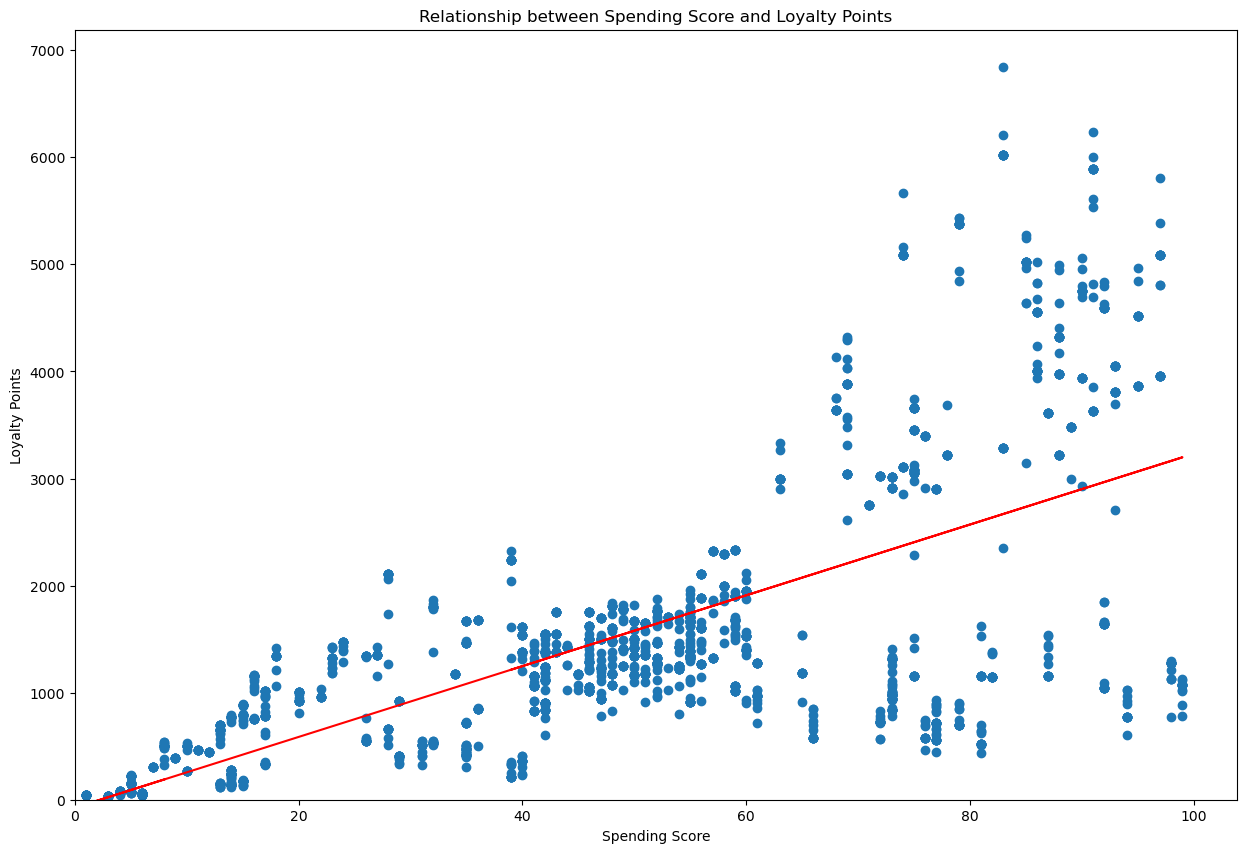

In [114]:
# Plot graph with regression line.

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlim(0)
plt.ylim(0)
plt.title('Relationship between Spending Score and Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.show()

### 5b) renumeration vs loyalty

In [115]:
# Define independent variable.
x = reviews_edit['remuneration']

# Define dependent variable.
y = reviews_edit['loyalty_points']

# Create model and print summary of metrics.
f = 'loyalty_points ~ remuneration'
test = ols(f, data = reviews_edit).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):          2.43e-209
Time:                        11:55:40   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -65.6865     52.171     -1.259      0.208    -168.001      36.628
remuneration    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept      -65.69
remuneration    34.19
dtype: float64
Standard errors:  Intercept       52.17
remuneration     0.98
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [117]:
#Set the coefficent and the constant to generate the regression table.
intercept = test.params['Intercept']
slope = test.params['remuneration']   
y_pred = intercept + slope * x   

# View the output.
y_pred

0        354.82
1        354.82
2        382.86
3        382.86
4        410.89
         ...   
1995    2821.82
1996    3102.16
1997    3102.16
1998    3298.40
1999    3102.16
Name: remuneration, Length: 2000, dtype: float64

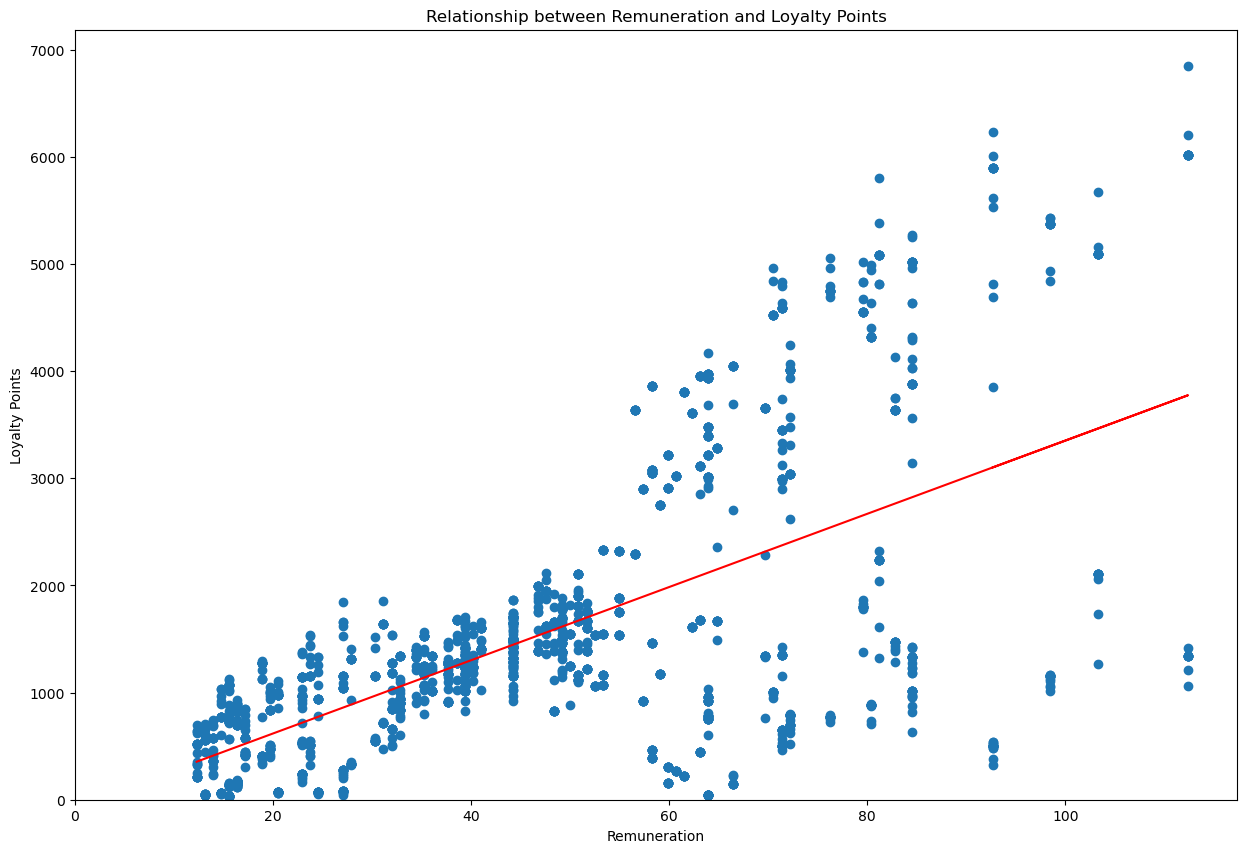

In [118]:
# Plot graph with regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlim(0)
plt.ylim(0)
plt.title('Relationship between Remuneration and Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.show()

### 5c) age vs loyalty

In [119]:
# Define independent variable.
x = reviews_edit['age']

# Define dependent variable.
y = reviews_edit['loyalty_points']

# Create model and print summary of metrics.
f = 'loyalty_points ~ age'
test = ols(f, data = reviews_edit).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 10 Jan 2026   Prob (F-statistic):             0.0577
Time:                        11:55:41   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.52
age            -4.01
dtype: float64
Standard errors:  Intercept    88.25
age           2.11
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [121]:
#Set the coefficent and the constant to generate the regression table.
intercept = test.params['Intercept']
slope = test.params['age']   
y_pred = intercept + slope * x   

# View the output.
y_pred

0       1664.29
1       1644.22
2       1648.24
3       1636.20
4       1604.10
         ...   
1995    1588.04
1996    1563.97
1997    1600.08
1998    1600.08
1999    1608.11
Name: age, Length: 2000, dtype: float64

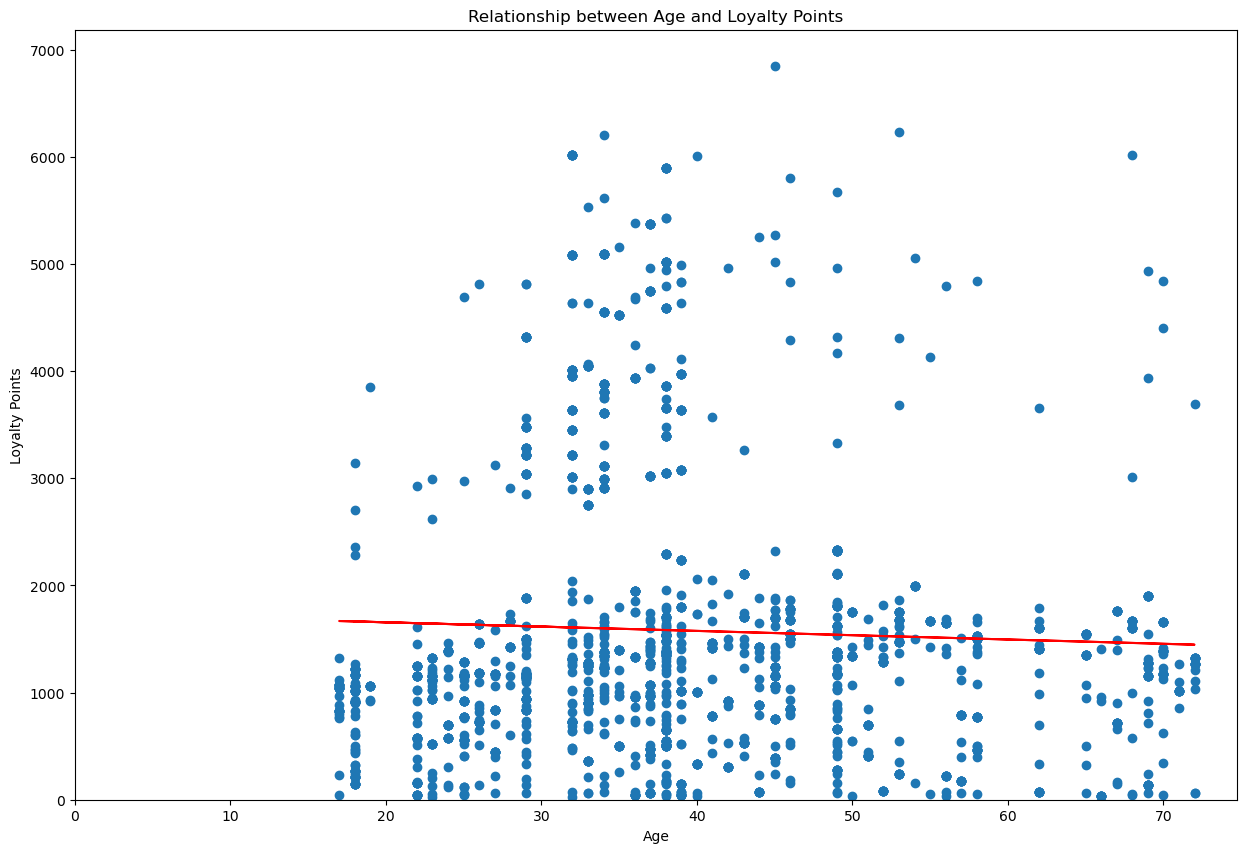

In [122]:
# Plot graph with regression line.
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlim(0)
plt.ylim(0)
plt.title('Relationship between Age and Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

## 6. Observations and insights

The scatterplots show three clear patterns in how customer characteristics relate to Loyalty Points.

First, Spending Score and Loyalty Points move broadly in the same direction. Customers with higher Spending Scores generally tend to earn more Loyalty Points, even though there’s still a fair amount of variation between customers with similar scores. This matches the statistics: the model explains about 45% of the differences in Loyalty Points (R² = 0.452), and the result is statistically significant (p < 0.05). So Spending Score is a reasonably strong indicator of how much value a customer generates.

The second relationship, between Remuneration and Loyalty Points, also shows a positive trend: customers with higher incomes usually accumulate more points. The scatter is wide but directionally consistent. Statistically, income explains about 38% of the variation in Loyalty Points (R² = 0.383), and the relationship is significant, meaning Remuneration has a meaningful, though not overwhelming, influence on spending.

By contrast, Age shows almost no relationship with Loyalty Points. The scatterplot has no real pattern, the regression line is basically flat, and the statistics back this up: R² is effectively zero (0.002), and the p-value (0.058) suggests the relationship is not statistically significant. In short, age doesn’t tell us anything useful about loyalty behaviour.

Overall, Spending Score and Remuneration both relate meaningfully to how customers spend, whereas Age does not.

# Section 2: Exploring the structure using decision trees

The team wants to use decision trees to attempt to better understand the structure found in the data. It's necessary to grow and prune a decision tree regressor and then visualise and interpret the output. In this section, the potential usefulness in decision-making processes of the decision tree plus some observations regarding the model are noted.

## 1. Load and prepare the data

In [123]:
# Imports
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn import metrics
import math
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Settings for the notebook.
plt.rcParams['figure.figsize'] = [15, 10]

In [124]:
# Create your new DataFrame.

# Drop unnecessary columns.
reviews_edit_2 = reviews_edit.drop(columns=['gender', 'age', 'education', 'product', 'review', 'summary'])

# View column names.
reviews_edit_2.columns

Index(['remuneration', 'spending_score', 'loyalty_points'], dtype='object')

In [125]:
reviews_edit_2.info

<bound method DataFrame.info of       remuneration  spending_score  loyalty_points
0            12.30              39             210
1            12.30              81             524
2            13.12               6              40
3            13.12              77             562
4            13.94              40             366
...            ...             ...             ...
1995         84.46              69            4031
1996         92.66               8             539
1997         92.66              91            5614
1998         98.40              16            1048
1999         92.66               8             479

[2000 rows x 3 columns]>

In [126]:
# Specify Y.
y = reviews_edit_2['loyalty_points']

# Specify X.
X = reviews_edit_2.drop(['loyalty_points'], axis = 1)

In [127]:
# Review X and Y.

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# calculate correlation matrix
print(reviews_edit_2.corr(method='pearson'))
print("")
print(vif_data)

                remuneration  spending_score  loyalty_points
remuneration        1.00e+00        5.61e-03            0.62
spending_score      5.61e-03        1.00e+00            0.67
loyalty_points      6.16e-01        6.72e-01            1.00

          feature   VIF
0    remuneration  2.78
1  spending_score  2.78


##### Observations
Variance Inflation Factor (VIF) was calculated to check for multicollinearity in the regression model. A VIF of 2.78 was found for both Spending Score and Remuneration, which is well within acceptable limits. This indicates that, although the variables are somewhat related, they are not sufficiently correlated to create problematic multicollinearity or distort the analysis.

## 2. Create train and test data sets.

In [128]:
# Split the data into test and train data.

# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

## 3. Create decision tree regressor

In [129]:
# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

# Create the 'DecisionTreeRegressor' class 
# (which has many parameters; input only #random_state=0).
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [130]:
# Evaluate the model.

# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))

# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error:  83.27339035039036
Mean Squared Error:  26097.98366433656
Root Mean Squared Error:  161.54870369129105


In [131]:
# Prune the model.

results = {}

for depth in range(2, 11):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = math.sqrt(metrics.mean_squared_error(y_test, preds))
    results[depth] = rmse
    
results

{2: 521.86560233442,
 3: 371.4332689077185,
 4: 302.929692312541,
 5: 262.24410614627584,
 6: 234.23507378449162,
 7: 219.8236313149256,
 8: 204.9072096043717,
 9: 190.56554041323773,
 10: 184.6101645730186}

## 4. Fit and plot final model.

In [132]:
# Fit and plot final model.
regressor_final = DecisionTreeRegressor(
    max_depth=30,
    random_state=42
)

In [133]:
regressor_final.fit(X_train, y_train)

y_pred_final = regressor_final.predict(X_test)

print("Final MAE:", metrics.mean_absolute_error(y_test, y_pred_final))
print("Final RMSE:", math.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))

Final MAE: 83.27339035039036
Final RMSE: 161.54870369129105


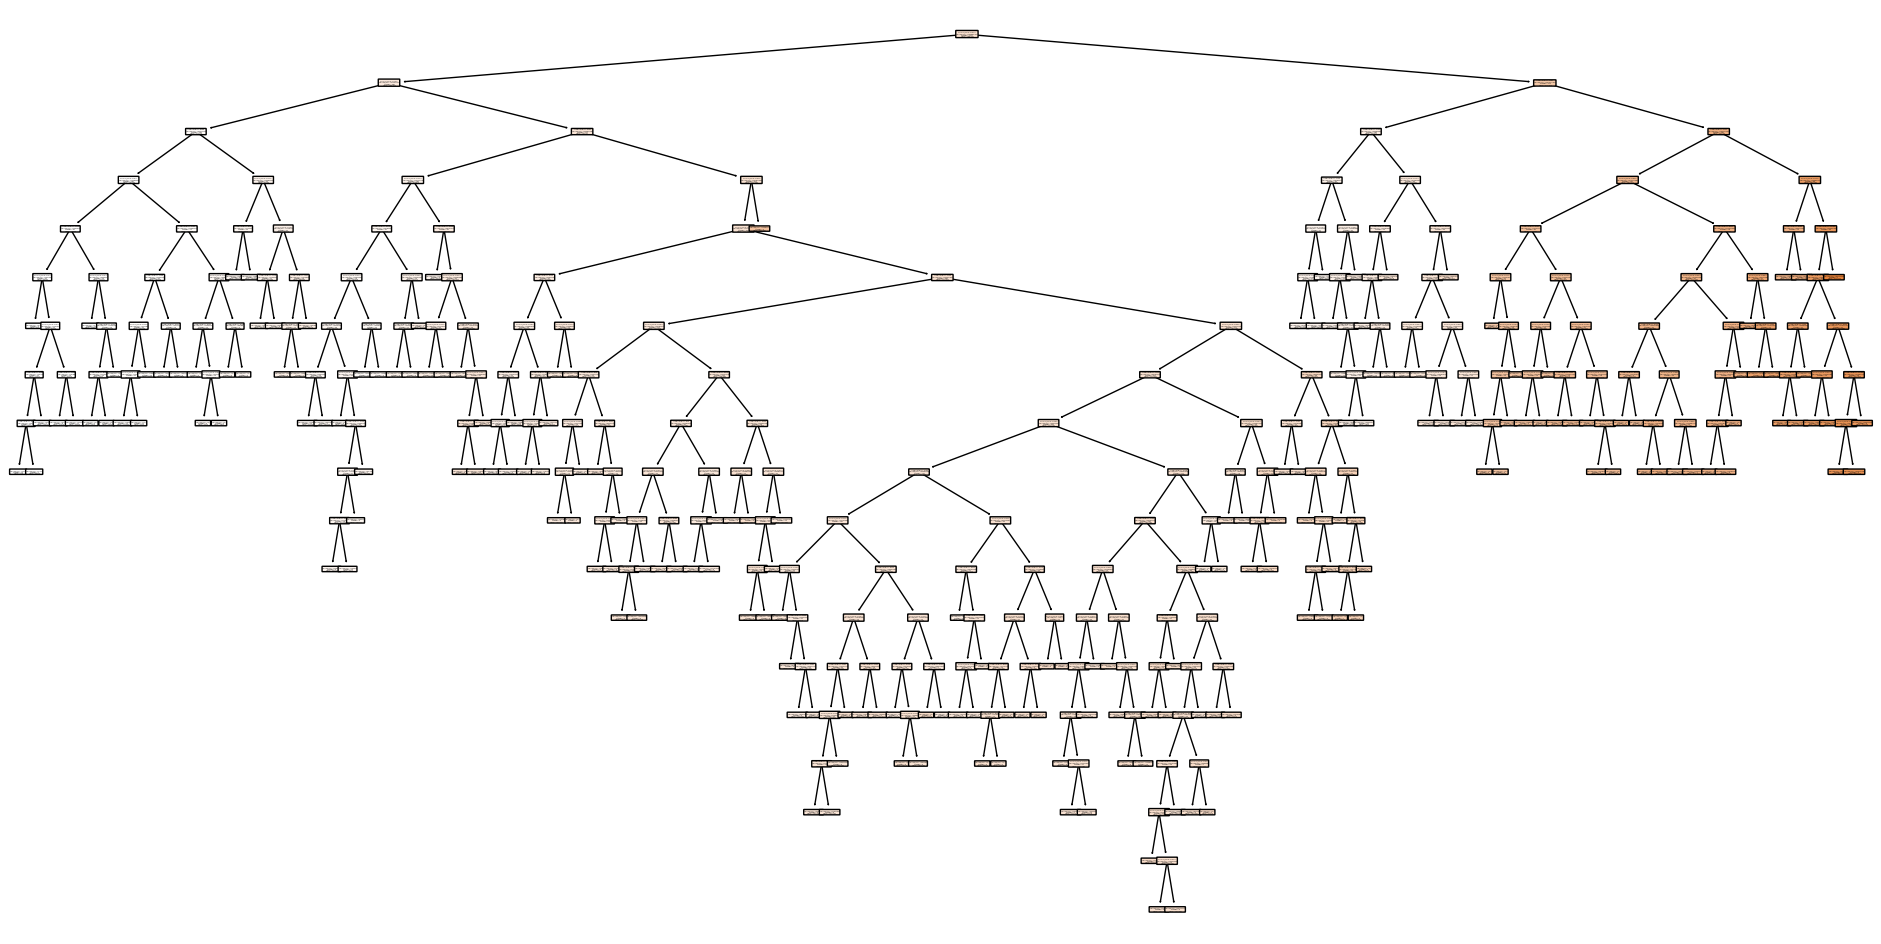

In [134]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
tree.plot_tree(
    regressor_final,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.show()

## 5. Observations and insights
A series of regression trees were fitted using different maximum depths. Trees with shallow depths (2–10) produced substantially higher Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values, indicating underfitting. As the depth increased, predictive performance improved. The lowest error occurred with the unpruned tree (MAE ≈ 83.3, RMSE ≈ 161.5), and setting max_depth to a high value such as 30 reproduced the same performance, confirming that the tree naturally grows to approximately this depth. This suggests that pruning to a smaller depth reduces important structure in the data. Therefore, the final model used the unpruned tree, which offered the best generalisation on the test data.

The RMSE (161) is approximately twice the MAE (83), showing that while the model performs well on average, there are some large but infrequent prediction errors. 

# Section 3: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. The task is to identify groups within the customer base that can be used to target specific market segments. *k*-means clustering is used to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [135]:
# Imports
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

#Required install: pip install --upgrade scikit-learn threadpoolctl
%matplotlib inline

import os
# Prevent loky/joblib from trying to auto-detect cores (avoids Windows wmic traceback)
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

In [136]:
# Load the CSV file(s) as df3.
# N/A

# Drop unnecessary columns.
df3 = reviews_edit.drop(columns=['gender', 'age', 'education', 'product', 'review', 'summary', 'loyalty_points'])

# View DataFrame.
df3.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [137]:
# Explore the data.
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [138]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score
count,2000.00,2000.00
mean,48.08,50.00
std,23.12,26.09
min,12.30,1.00
25%,30.34,32.00
50%,47.15,50.00
75%,63.96,73.00
max,112.34,99.00


## 2. Plot

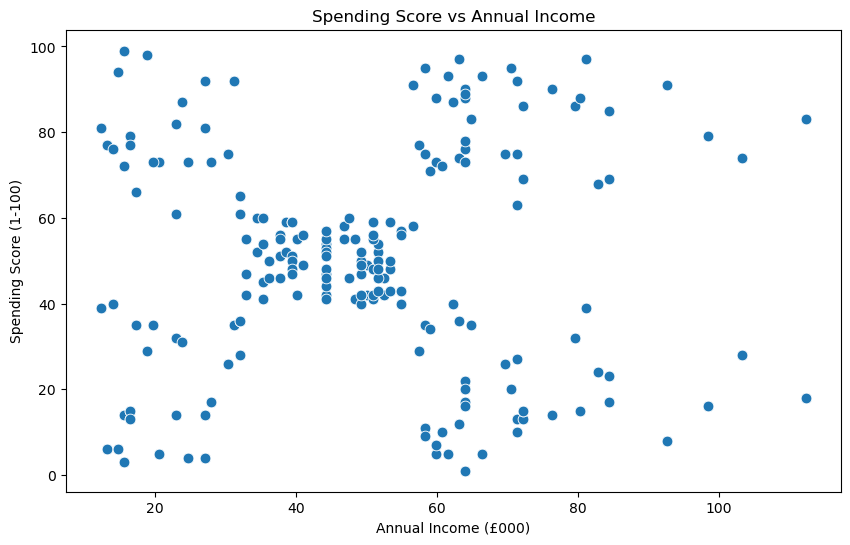

In [139]:
# Create a scatterplot with Seaborn.

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'remuneration',y = 'spending_score',  data = df3  ,s = 60 )
plt.xlabel('Annual Income (£000)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score vs Annual Income')
plt.show()

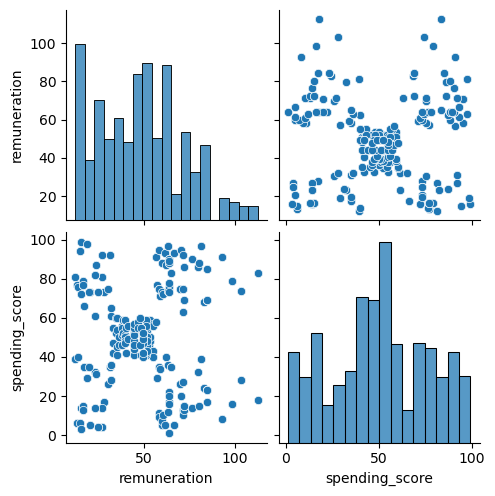

In [140]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)
plt.show()

## 3. Elbow and silhouette methods

In [141]:
#Create a DataFrame including only the remuneration (Annual Income) and Spending score
X=df3[["remuneration","spending_score"]]

#The input data
X.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [142]:
# Determine the number of clusters: Elbow method
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

wcss

[2430088.595032784,
 1527364.876245199,
 1006659.3689455049,
 633387.5677305018,
 348507.35681972746,
 302096.8179823197,
 256031.03531098948,
 215468.6517359532,
 182885.0230206352,
 163800.40518784773]

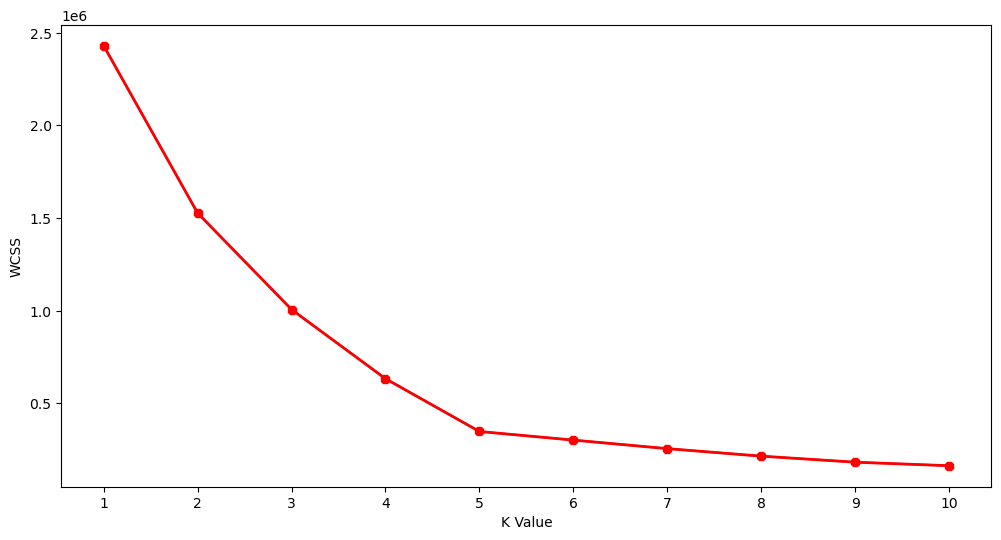

In [143]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

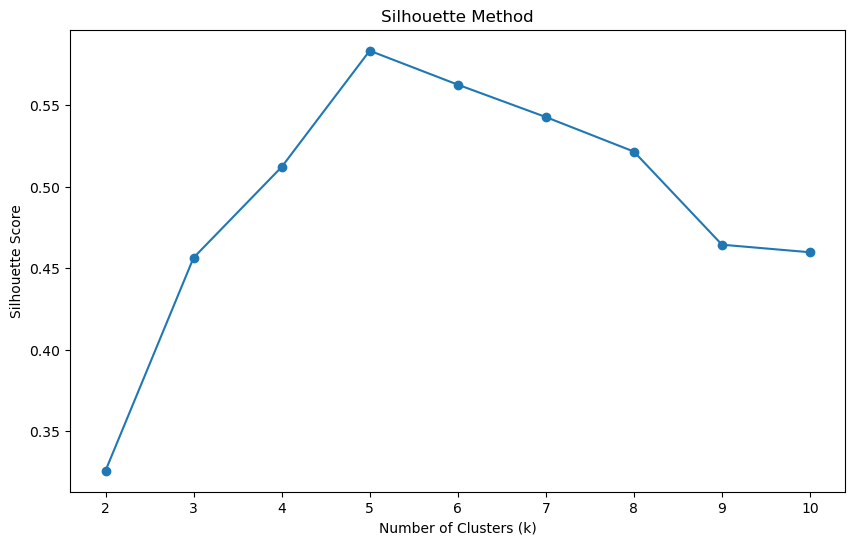

In [144]:
# Determine the number of clusters: Silhouette method.

# Create an empty list to store silhouette scores
silhouette_scores = []

# Loop through different values of k
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    y_pred = km.predict(X)
    
    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

## 4. Evaluate k-means model at different values of *k*

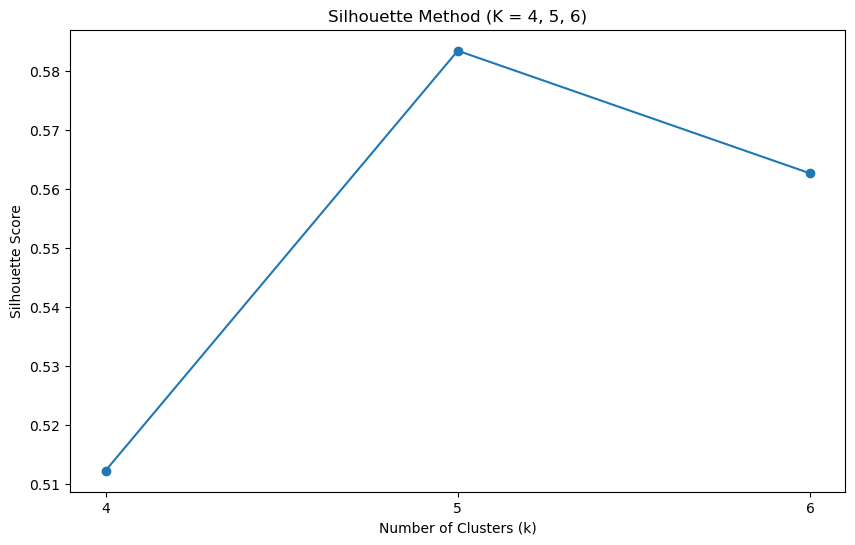

In [145]:
# Plot silhouette scores for K=4, K=5, and K=6 only.
silhouette_scores = []

for k in range(4, 7):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    y_pred = km.predict(X)
    
    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(4, 7), silhouette_scores, marker='o')
plt.title('Silhouette Method (K = 4, 5, 6)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(4, 7))
plt.show()

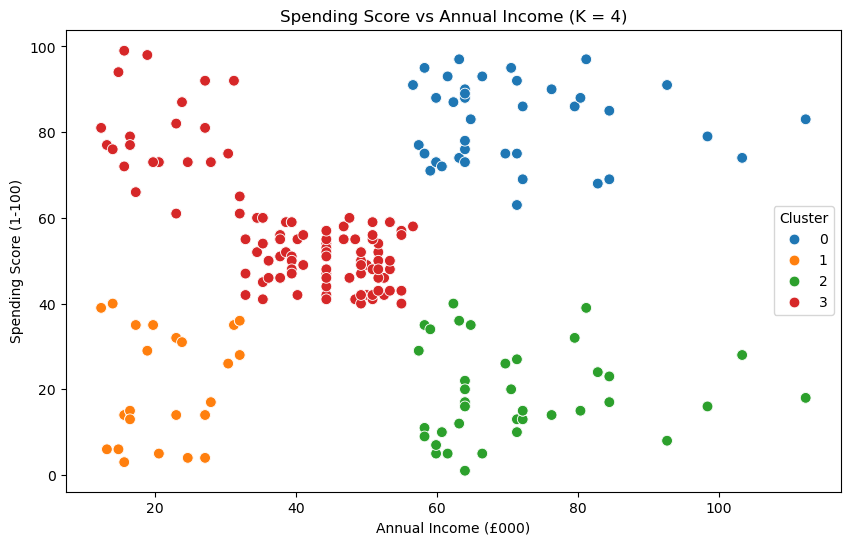

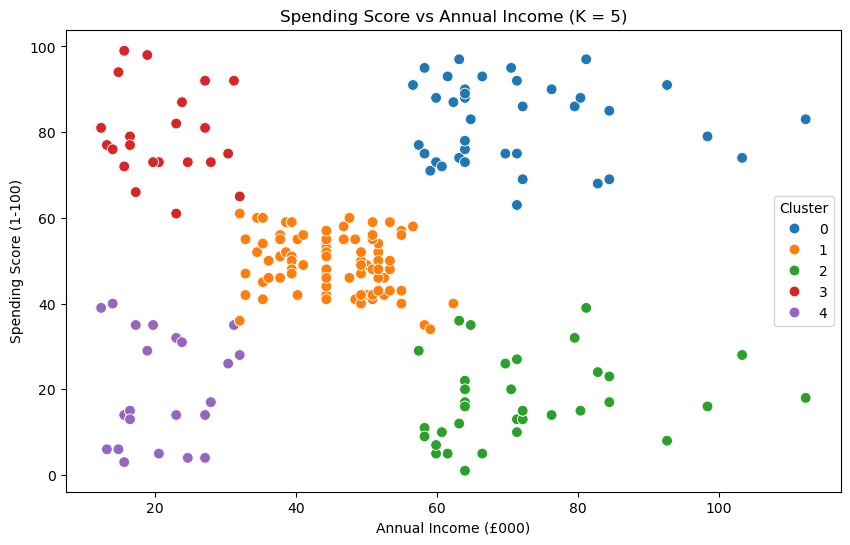

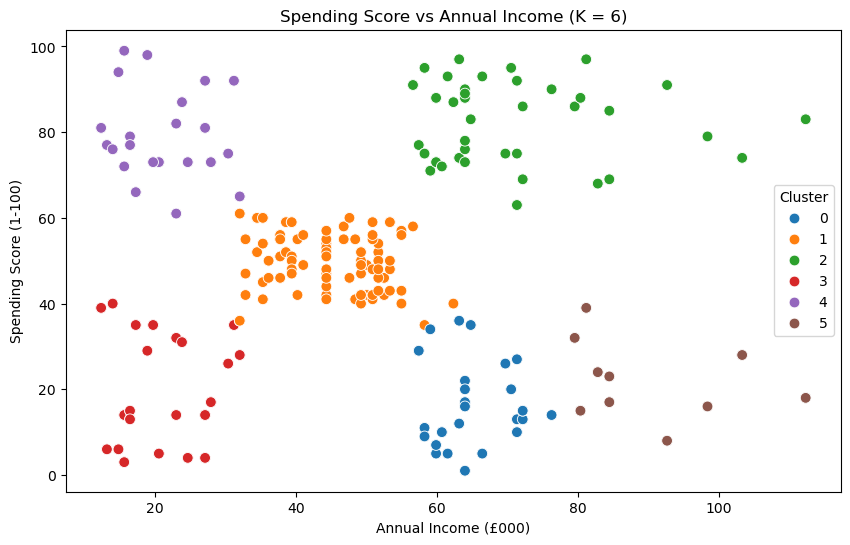

In [146]:
# Create scatter charts where K=4, K=5, and K=6 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X already defined as:
# X = df3[['remuneration', 'spending_score']]

for k in [4, 5, 6]:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    y = km.predict(X)

    # Add a temporary label column for plotting
    df3[f'label_{k}'] = y

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='remuneration',
        y='spending_score',
        hue=f'label_{k}',
        palette='tab10', 
        data=df3,
        s=60,
        legend='full'
    )

    plt.title(f'Spending Score vs Annual Income (K = {k})')
    plt.xlabel('Annual Income (£000)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

#### Observations on which value of K gives the best clustering
The Elbow and Silhouette plots both show clear peaks at K = 5, indicating strong cohesion and good separation between clusters. The scatterplots support this:
- K = 4 under-segments the data, forcing visibly distinct groups into a single cluster.
- K = 6 over-segments the data, creating clusters with very similar profiles.

In contrast, K = 5 produces well-defined, interpretable clusters.

## 5. Fit final model and justify your choice

Based on the Elbow method, Silhouette analysis, and visual inspection of clustering performance evaluated in Step 4, K = 5 was selected as the most appropriate solution. It provides good separation and produces interpretable customer segments with distinct spending and remuneration patterns.

The final K-means model was fitted using K = 5 and produces five distinct clusters. The table below summarises their mean remuneration, mean spending score, and relative size.

In [147]:
# Apply the final model.
km_final = KMeans(n_clusters=5, n_init=10, random_state=42)
km_final.fit(X)
df3['label_5'] = km_final.labels_

In [148]:
profile_5 = df3.groupby('label_5').agg({
    'remuneration': 'mean',
    'spending_score': 'mean',
    'label_5': 'count'
}).rename(columns={'label_5': 'cluster_size'})

profile_5

,remuneration,spending_score,cluster_size
label_5,,,
0,73.24,82.01,356
1,44.42,49.53,774
2,74.83,17.42,330
3,20.35,79.42,269
4,20.42,19.76,271


## 6. Plot and interpret the clusters

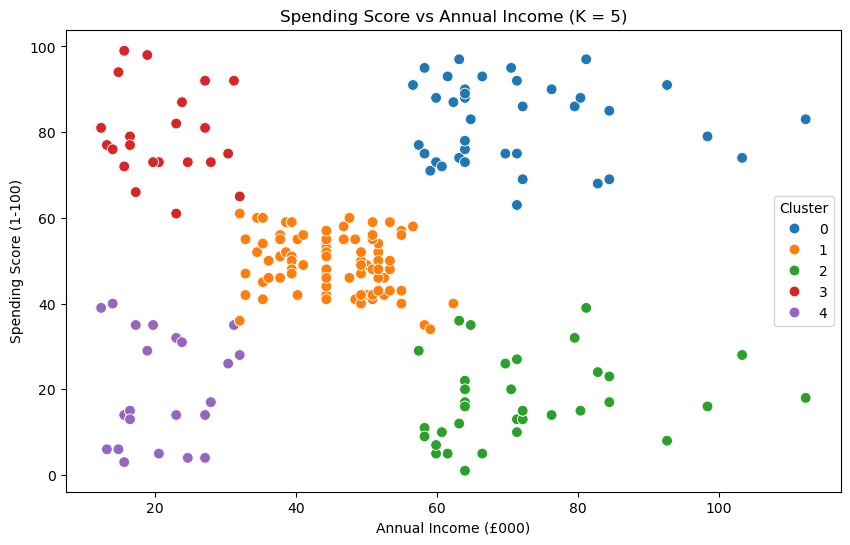

In [149]:
# Visualize the cluster.
y = km_final.predict(X)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='remuneration', y='spending_score', hue="label_5", palette='tab10', data=df3, s=60,
    legend='full')

plt.xlabel('Annual Income (£000)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score vs Annual Income (K = 5)')
plt.legend(title='Cluster')
plt.show()

The final K-means model reveals five distinct customer groups with different levels of spending capacity, brand engagement, and commercial value. This provides a structured way to understand who drives value today and where future growth may come from.



In [150]:
# Assign names to each cluster.
segment_names = {
    0: "High-Value Engagers",
    1: "Core Steady Spenders",
    2: "Under-Engaged Affluent",
    3: "Enthusiastic Value Buyers",
    4: "Low Engagement, Low Capacity"
}

df3["segment_names"] = df3["label_5"].map(segment_names)

df3

,remuneration,spending_score,label_4,label_5,label_6,segment_names
0,12.30,39,1,4,3,"Low Engagement, Low Capacity"
1,12.30,81,3,3,4,Enthusiastic Value Buyers
2,13.12,6,1,4,3,"Low Engagement, Low Capacity"
3,13.12,77,3,3,4,Enthusiastic Value Buyers
4,13.94,40,1,4,3,"Low Engagement, Low Capacity"
...,...,...,...,...,...,...
1995,84.46,69,0,0,2,High-Value Engagers
1996,92.66,8,2,2,5,Under-Engaged Affluent
1997,92.66,91,0,0,2,High-Value Engagers
1998,98.40,16,2,2,5,Under-Engaged Affluent


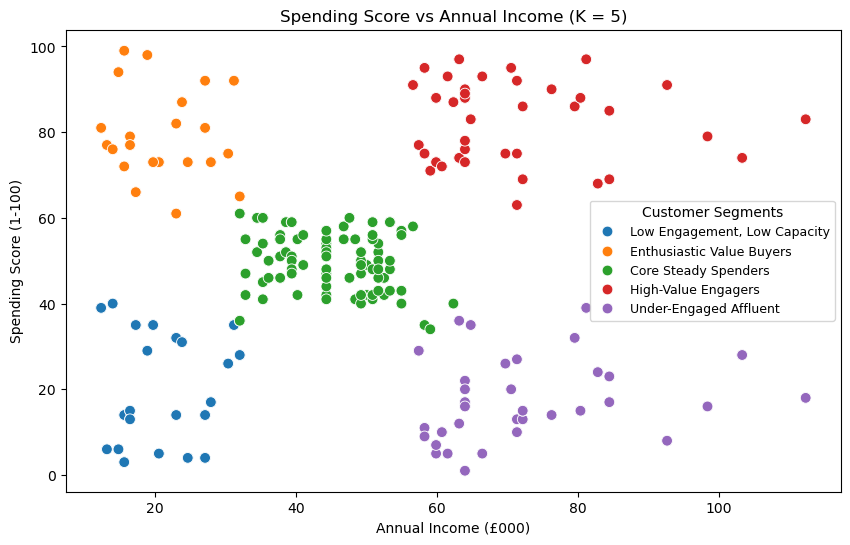

In [151]:
# Visualise the cluster including the segment names in the chart legend.
y = km_final.predict(X)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='remuneration', y='spending_score', hue="segment_names", palette='tab10', data=df3, s=60)

plt.title(f'Spending Score vs Annual Income (K = 5)')
plt.xlabel('Annual Income (£000)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title="Customer Segments", fontsize=9)
plt.savefig("cluster_chart.png", dpi=300, bbox_inches="tight")
plt.show()

## 7. Observations and insights
Here are some observations on how customers belonging to each of the five clusters could be characterized.

##### Cluster 0 — “High-Value Engagers — high income, highly engaged, premium value customers”
(Mean remuneration: 73k Mean spending score: 82 Cluster size: 356)
Customers in this segment have relatively high remuneration levels and consistently high spending scores. This group appears to represent financially comfortable customers who also engage strongly with Turtle Games’ products. They may be a key segment for premium offerings, early access events, or membership programmes.

##### Cluster 1 — “Core Steady Spenders — mid income and moderate engagement”
(Mean remuneration: 44k Mean spending score: 50 Cluster size: 774)
This is the largest cluster, representing customers with mid-range income and average spending behaviour. Their purchasing pattern does not appear extreme in either direction. They may respond well to value-oriented promotions and mid-priced product lines.

##### Cluster 2 — “Under-Engaged Affluent — high income but low engagement, a key growth opportunity”
(Mean remuneration: 75k Mean spending score: 17 Cluster size: 330)
Despite high remuneration, this group has very low spending scores. This might indicate customers who are financially well-off but do not engage deeply with the brand or tend to make only occasional purchases. Further analysis (e.g., product preferences or tenure) might help explain their lower spending behaviour.

##### Cluster 3 — “Enthusiastic Value Buyers — lower income but highly engaged, very emotionally connected to the brand”
(Mean remuneration: 20k Mean spending score: 79 Cluster size: 269) These customers have low remuneration levels but relatively high spending scores. This could reflect enthusiastic purchasers who prioritise spending on games or related products, even within constrained budgets. Discounts, bundle deals, or reward schemes might particularly appeal to this segment.

##### Cluster 4 — “Low Engagement, Low Capacity — limited engagement and spend potential”
(Mean remuneration: 20k Mean spending score: 20 Cluster size: 271)
This segment includes customers with limited financial resources and low spending scores. Purchasing appears infrequent or low-value. Promotions aimed at budget-conscious buyers may be relevant here, though the segment may offer limited revenue potential and should be engaged in a cost-effective manner.

## 8. Additional analysis
Some additional analysis was conducted to examine what portion of the total customer base and share of loyalty points is accounted for by each segment. To support this, a "Customer Value Index" metric was introduced, showing how much value each segment delivers relative to its size. The index is calculated by dividing each segment’s share of total loyalty points by its share of customers.

In [152]:
# Add information about segments to the reviews_edit DataFrame.

reviews_edit["cluster_k5"] = df3["label_5"].values

reviews_edit.head(5)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,cluster_k5
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4


In [153]:
# Create a summary table
cluster_col = "cluster_k5"

summary = (
    reviews_edit
    .groupby(cluster_col)
    .agg(
        cluster_size=("loyalty_points", "size"),
        avg_loyalty_points=("loyalty_points", "mean"),
        total_loyalty_points=("loyalty_points", "sum"),
        avg_remuneration=("remuneration", "mean"),
        avg_spending_score=("spending_score", "mean"),
    )
)

# Add segment names
summary["segment_name"] = summary.index.map(segment_names)

# Shares and index
summary["cust_share_pct"] = 100 * summary["cluster_size"] / summary["cluster_size"].sum()
summary["loyalty_share_pct"] = 100 * summary["total_loyalty_points"] / summary["total_loyalty_points"].sum()
summary["value_index"] = summary["loyalty_share_pct"] / summary["cust_share_pct"]

# Reorder columns for presentation
summary = summary[[
    "segment_name",
    "cluster_size",
    "cust_share_pct",
    "avg_loyalty_points",
    "total_loyalty_points",
    "loyalty_share_pct",
    "value_index",
    "avg_remuneration",
    "avg_spending_score",
]]

summary

,segment_name,cluster_size,cust_share_pct,avg_loyalty_points,total_loyalty_points,loyalty_share_pct,value_index,avg_remuneration,avg_spending_score
cluster_k5,,,,,,,,,
0,High-Value Engagers,356,17.80,3988.24,1419813,44.99,2.53,73.24,82.01
1,Core Steady Spenders,774,38.70,1420.38,1099376,34.83,0.90,44.42,49.53
2,Under-Engaged Affluent,330,16.50,911.76,300881,9.53,0.58,74.83,17.42
3,Enthusiastic Value Buyers,269,13.45,971.94,261453,8.28,0.62,20.35,79.42
4,"Low Engagement, Low Capacity",271,13.55,275.06,74541,2.36,0.17,20.42,19.76


In [154]:
# Create a presentation version (rename columns)
present = summary.rename(columns={
    "segment_name": "Customer Segment",
    "cluster_size": "Number of Customers",
    "cust_share_pct": "% of Customer Base",
    "avg_loyalty_points": "Avg Loyalty Points",
    "total_loyalty_points": "Total Loyalty Points",
    "loyalty_share_pct": "% of Loyalty Value",
    "value_index": "Value Index",
    "avg_remuneration": "Avg Remuneration",
    "avg_spending_score": "Avg Spending Score",
})

# Format display (commas, decimals) without changing underlying numbers
styled_present = present.style.format({
    "Number of Customers": "{:,.0f}",
    "% of Customer Base": "{:.0f}",
    "Avg Loyalty Points": "{:,.0f}",
    "Total Loyalty Points": "{:,.0f}",   # commas
    "% of Loyalty Value": "{:.0f}",
    "Value Index": "{:.2f}",             # decimals (e.g. 0.19)
    "Avg Remuneration": "{:.2f}",
    "Avg Spending Score": "{:.2f}",
})

# Save to an exportable format
styled_present.to_html("turtle_segments_table.html")

styled_present

,Customer Segment,Number of Customers,% of Customer Base,Avg Loyalty Points,Total Loyalty Points,% of Loyalty Value,Value Index,Avg Remuneration,Avg Spending Score
cluster_k5,,,,,,,,,
0,High-Value Engagers,356,18,"3,988","1,419,813",45,2.53,73.24,82.01
1,Core Steady Spenders,774,39,"1,420","1,099,376",35,0.90,44.42,49.53
2,Under-Engaged Affluent,330,16,912,"300,881",10,0.58,74.83,17.42
3,Enthusiastic Value Buyers,269,13,972,"261,453",8,0.62,20.35,79.42
4,"Low Engagement, Low Capacity",271,14,275,"74,541",2,0.17,20.42,19.76


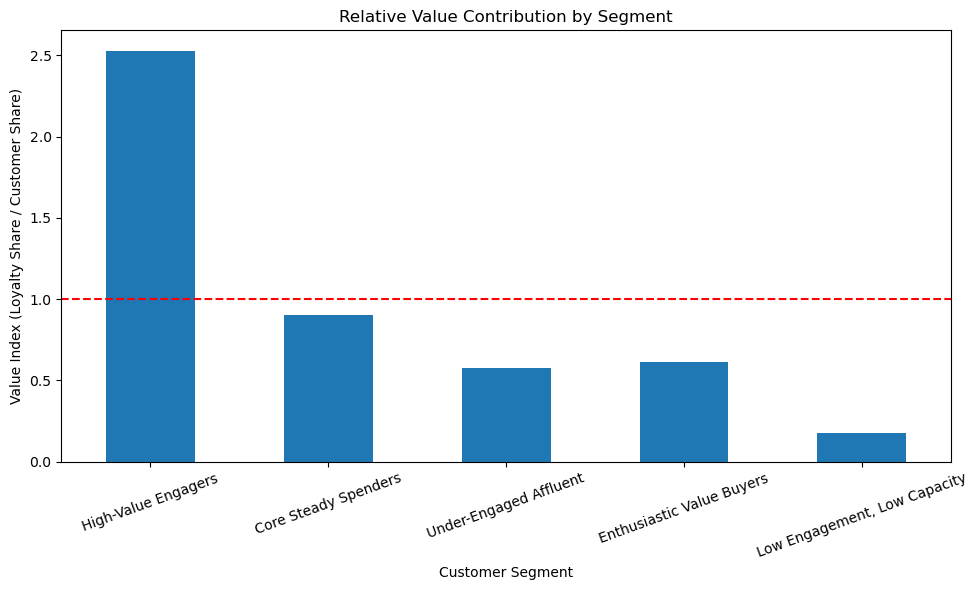

In [155]:
# Create a column chart 
ax = (
    summary
    .set_index("segment_name")["value_index"]
    .plot(kind="bar", figsize=(10, 6))
)

ax.axhline(1, color='red', linestyle='--')  # reference line
ax.set_ylabel("Value Index (Loyalty Share / Customer Share)")
ax.set_xlabel("Customer Segment")
ax.set_title("Relative Value Contribution by Segment")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Observations and insights
Some key findings: High-Value Engagers are a relatively small segment (18% of customer base), but contribute a disproportionately large share of value, accounting for 45% of loyalty points. Core Steady Spenders broadly match their size, and the other three segments contribute significantly less.

The outsized contribution of the High-Value Engagers is obvious from the Customer Value Index chart. High-Value Engagers massively over-index, Core Steady Spenders are broadly neutral, and the other three segments under-index, especially Low Engagement, Low Capacity.

# Section 4: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department has asked that the 15 most common words used in online product reviews be identified. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, NLP was applied to the data set.

## 1. Load and explore the data

In [156]:
# Imports
import nltk 
import os

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter

# Download NLTK resources to assist with tokenisation.
nltk.download('punkt')
nltk.download ('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adyat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adyat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
# View DataFrame.
reviews_edit.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,cluster_k5
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4


In [158]:
# Explore data set.
# View the data.
reviews_edit.shape

(2000, 10)

In [159]:
# Keep necessary columns. Drop unnecessary columns.
reviews_edit_3 = reviews_edit.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'])

# View DataFrame.
reviews_edit_3.head()

,review,summary,cluster_k5
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,3
4,As my review of GF9's previous screens these w...,Money trap,4


In [160]:
# Determine if there are any missing values (the number of rows where the comments are not populated) in the "reviews" column.
reviews_edit_3['review'].isna().sum()

np.int64(0)

In [161]:
# Determine if there are any missing values (the number of rows where the comments are not populated) in the "summary" column.
reviews_edit_3['summary'].isna().sum()

np.int64(0)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [162]:
# Review: Change all to lower case and join with a space.
reviews_edit_3['review'] = reviews_edit_3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_edit_3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [163]:
# Summary: Change all to lower case and join with a space.
reviews_edit_3['summary'] = reviews_edit_3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_edit_3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [164]:
# Replace all the punctuation in the review column.
reviews_edit_3['review']  = reviews_edit_3['review'].str.replace(r'[^\w\s]', '', regex=True)

# View output.
reviews_edit_3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [165]:
# Replace all the punctuations in the summary column.
reviews_edit_3['summary'] = reviews_edit_3['summary'].str.replace(r'[^\w\s]', '', regex=True)

# View output.
reviews_edit_3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

#### Note: 
Although instructions suggested removing duplicated review/summary text, doing so would incorrectly remove rows where different customers were making similar comments, which are not true duplicates. Removing these rows would lead to bias being introduced into the dataset. Therefore, this step was not peformed, although the code is retained here for reference.

In [166]:
# Check the number of duplicate values in the review column.
reviews_edit_3.review.duplicated().sum()

np.int64(50)

In [167]:
# Drop duplicates.
# reviews_edit_4 = reviews_edit_3.drop_duplicates(subset=['review'])

# Preview data.
# reviews_edit_4.reset_index(inplace=True)
# reviews_edit_4.head()

In [168]:
# Check the number of duplicate values in the summary column.
# reviews_edit_4.summary.duplicated().sum()

In [169]:
# Drop duplicates.
# reviews_edit_5 = reviews_edit_4.drop_duplicates(subset=['summary'])

# Preview data.
# reviews_edit_5.reset_index(inplace=True)
# reviews_edit_5.head()

## 3. Tokenise and create wordclouds

In [170]:
# Create new DataFrame (copy DataFrame) for reviews.
reviews_nlp = reviews_edit_3

# View DataFrame.
reviews_nlp.head()

,review,summary,cluster_k5
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,4
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,3
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,4
3,amazing buy bought it as a gift for our new dm...,five stars,3
4,as my review of gf9s previous screens these we...,money trap,4


In [171]:
# Drop any unwanted index-related columns if they exist
reviews_nlp = reviews_nlp.drop(columns=['index', 'level_0'], errors='ignore')

# Reset the index cleanly
reviews_nlp = reviews_nlp.reset_index(drop=True)

# Check structure
reviews_nlp.info()
reviews_nlp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      2000 non-null   object
 1   summary     2000 non-null   object
 2   cluster_k5  2000 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 39.2+ KB


,review,summary,cluster_k5
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,4
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,3
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,4
3,amazing buy bought it as a gift for our new dm...,five stars,3
4,as my review of gf9s previous screens these we...,money trap,4


In [172]:
# String all the comments from the review and summary columns together in a single variable.
all_review_comments = " ".join(reviews_nlp['review'])
all_summary_comments = " ".join(reviews_nlp['summary'])

tokens_review = word_tokenize(all_review_comments)
tokens_summary = word_tokenize(all_summary_comments)

In [173]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_review_2 = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens_summary_2 = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_review_2_string = ''
tokens_summary_2_string = ''

for value in tokens_review_2:
    # Add each filtered token word to the string.
    tokens_review_2_string = tokens_review_2_string + value + ' '

for value in tokens_summary_2:
    # Add each filtered token word to the string.
    tokens_summary_2_string = tokens_summary_2_string + value + ' '


In [174]:
tokens_review_2_string[:1000]

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgot

In [175]:
tokens_summary_2_string[:1000]

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap five stars best gm screen ever five stars great could even better another missed opportunity value add product line five stars love map general dm screen weak game fell completely flat five stars good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful great pictures nice five stars five stars five stars five stars five stars five stars four stars three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures

In [176]:
# Review: Create a word cloud for the review columns.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_review_2_string) 

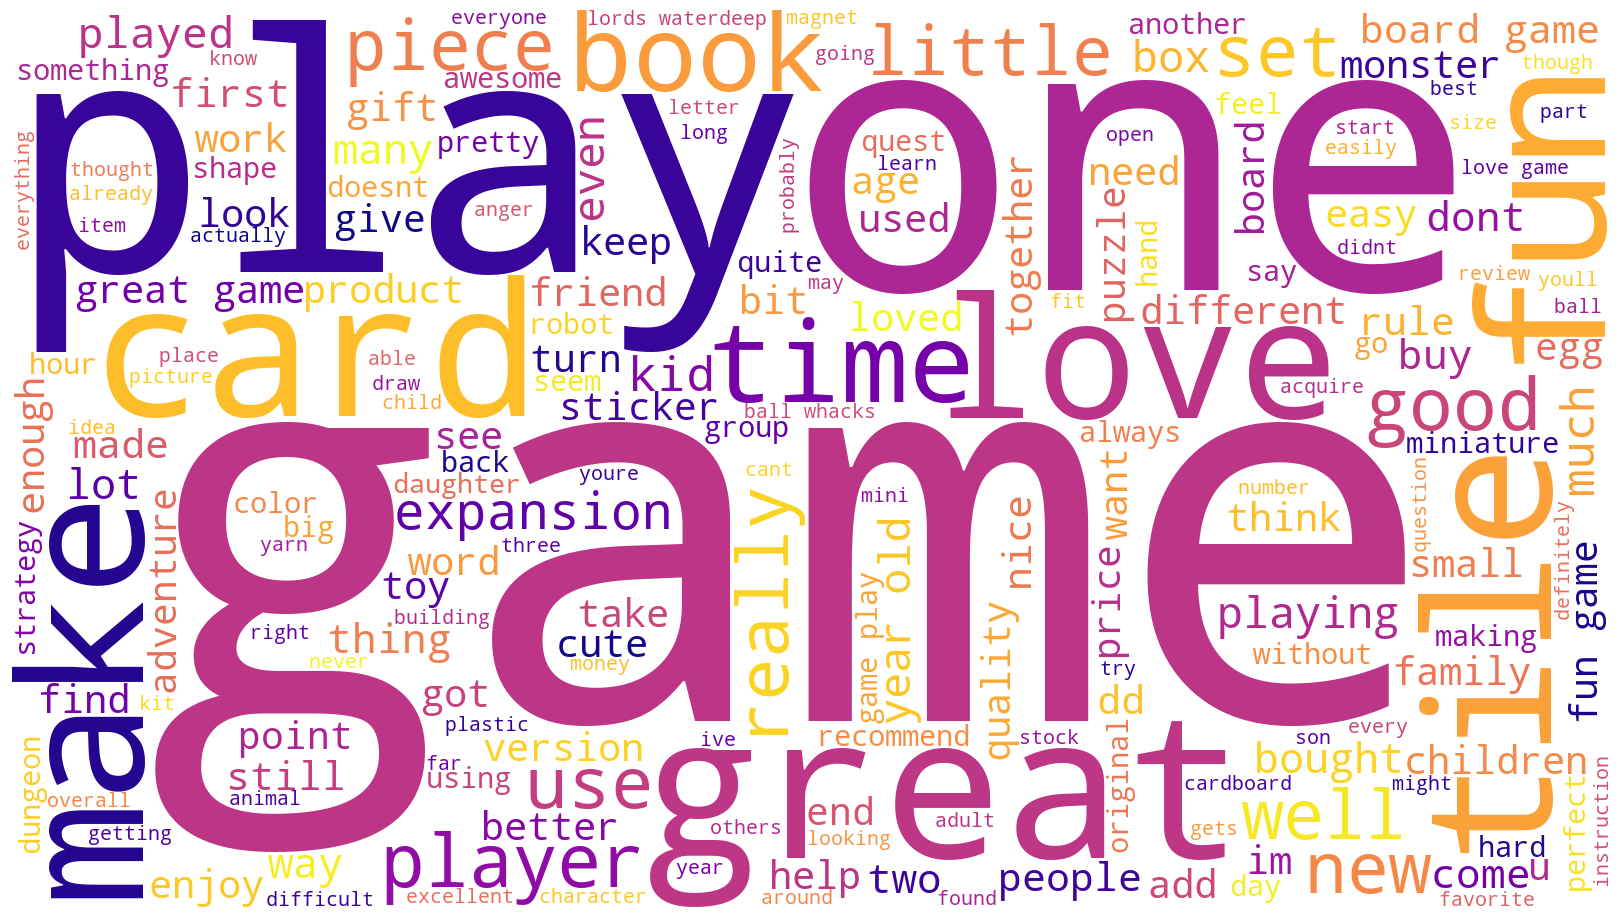

In [177]:
# Review: Plot the WordCloud image.                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [178]:
# Review: Create a word cloud for the summary columns.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summary_2_string) 

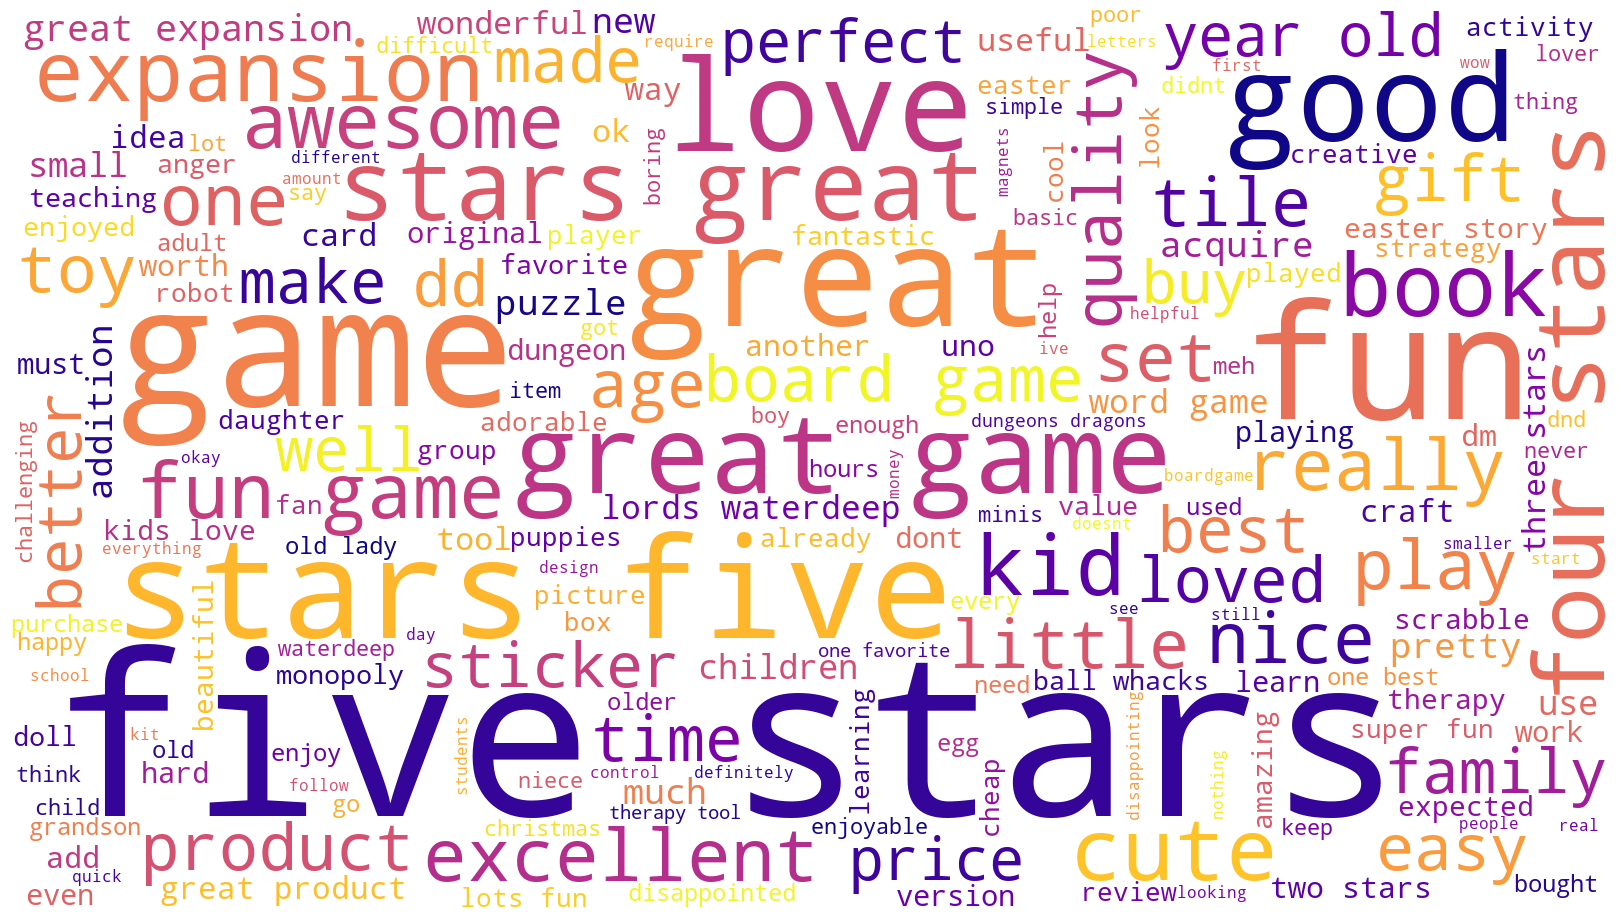

In [179]:
# Review: Plot the WordCloud image.                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [180]:
# Determine the frequency distribution for the review column.

# View the frequency distribution.
fdist_review = FreqDist(tokens_review_2)

# Preview the data.
fdist_review

FreqDist({'game': 1685, 'great': 596, 'fun': 553, 'one': 530, 'play': 502, 'like': 414, 'love': 331, 'really': 319, 'get': 319, 'cards': 301, ...})

In [181]:
# Determine the frequency distribution for the summary column.

# View the frequency distribution.
fdist_summary = FreqDist(tokens_summary_2)

# Preview the data.
fdist_summary

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4b) Identify 15 most common words and polarity

In [182]:
# Determine the 15 most common words in the "review" column.

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens_review_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1685
great,596
fun,553
one,530
play,502
like,414
love,331
really,319
get,319


In [183]:
# Determine the 15 most common words in the "summary" column.

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens_summary_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
stars,466
five,381
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [184]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment
reviews_nlp['review_polarity'] = reviews_nlp['review'].apply(generate_polarity)
reviews_nlp['summary_polarity'] = reviews_nlp['summary'].apply(generate_polarity)

In [185]:
# View output
reviews_nlp

,review,summary,cluster_k5,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,4,-0.04,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,3,0.04,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,4,0.12,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,3,0.58,0.00
4,as my review of gf9s previous screens these we...,money trap,4,-0.32,0.00
...,...,...,...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,0,0.17,0.20
1996,great game did not think i would like it when ...,super fun,2,0.16,0.32
1997,great game for all keeps the mind nimble,great game,0,0.20,0.20
1998,fun game,four stars,2,-0.05,0.00


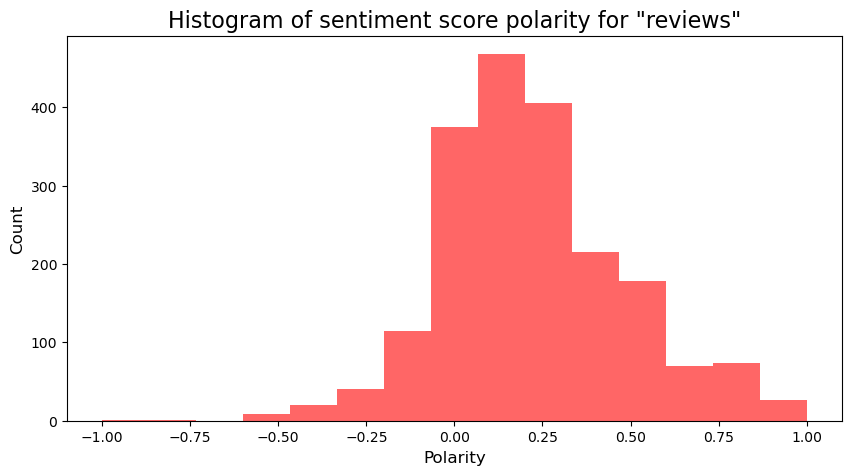

In [186]:
# Review: Create a histogram plot for "reviews".

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(reviews_nlp['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for "reviews"', fontsize=16)

plt.show()

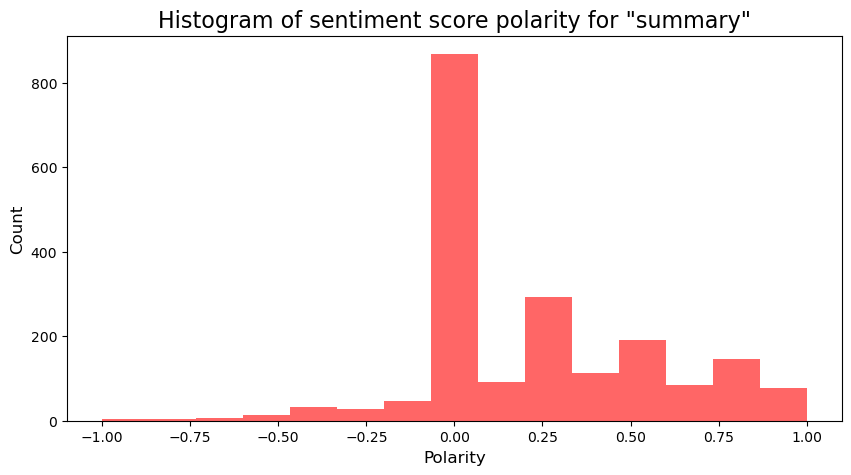

In [187]:
# Review: Create a histogram plot for "summary"

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(reviews_nlp['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for "summary"', fontsize=16)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [188]:
# Top 20 negative reviews.

# Create a DataFrame.
review_negative_sentiment = reviews_nlp.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_negative_sentiment = review_negative_sentiment[['review', 'review_polarity']]

# Adjust the column width.
review_negative_sentiment.style.set_properties(subset=['review'], **{'width': '750px'})

,review,review_polarity
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
227,this was a gift for my daughter i found it difficult to use,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000


In [189]:
# Top 20 negative summaries.

# Create a DataFrame.
summary_negative_sentiment = reviews_nlp.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_negative_sentiment = summary_negative_sentiment[['summary', 'summary_polarity']]

# Adjust the column width.
summary_negative_sentiment.style.set_properties(subset=['summary'], **{'width': '500px'})

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
144,disappointed,-0.750000
631,disappointed,-0.750000
793,disappointed,-0.750000
1620,disappointed,-0.750000
363,promotes anger instead of teaching calming methods,-0.700000


In [190]:
# Top 20 positive reviews.

# Create a DataFrame.
review_positive_sentiment = reviews_nlp.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
review_positive_sentiment = review_positive_sentiment[['review', 'review_polarity']]

# Adjust the column width.
review_positive_sentiment.style.set_properties(subset=['review'], **{'width': '650px'})

,review,review_polarity
7,came in perfect condition,1.000000
165,awesome book,1.000000
194,awesome gift,1.000000
496,excellent activity for teaching selfmanagement skills,1.000000
524,perfect just what i ordered,1.000000
591,wonderful product,1.000000
609,delightful product,1.000000
621,wonderful for my grandson to learn the resurrection story,1.000000
790,perfect,1.000000
933,awesome,1.000000


In [191]:
# Top 20 positive summaries.

# Create a DataFrame.
summary_positive_sentiment = reviews_nlp.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
summary_positive_sentiment = summary_positive_sentiment[['summary', 'summary_polarity']]

# Adjust the column width.
summary_positive_sentiment.style.set_properties(subset=['summary'], **{'width': '300px'})

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
134,perfect for preschooler,1.000000
140,awesome sticker activity for the price,1.000000
161,awesome book,1.000000
163,he was very happy with his gift,1.000000
187,awesome,1.000000
210,awesome and welldesigned for 9 year olds,1.000000


## 7. Observations and insights

##### Most common words
Word-frequency analysis shows a high degree of overlap between the Review and Summary text. In both cases, common terms such as “great”, “fun”, and “love” dominate, indicating broadly positive customer sentiment but offering limited insight into specific drivers of satisfaction or dissatisfaction. 

That said, the Summary text provides slightly clearer and more focused signals. It also includes more product-specific words such as “expansion”, “book”, and “set”, which suggest that customers tend to use summaries to comment directly on the products themselves rather than on delivery or service-related issues. 


##### Sentiment score polarity
Sentiment scores for the Review text are mostly neutral to moderately positive and spread over a wide range, reflecting the more balanced and descriptive nature of longer feedback. Summary sentiment shows greater variation and more extreme values, suggesting that short summaries express emotion more clearly. Overall, automated sentiment analysis works well for capturing general emotional tone, but is less effective at identifying the subtle meaning found in longer reviews.


##### Most positive and negative reviews and summaries
The most positive reviews and summaries express enthusiasm using short, direct expressions such as “awesome”, “perfect”, and “wonderful”. Many also mention gift-giving, particularly for children and family members, highlighting the emotional and social context in which Turtle Games products are often purchased.

Negative summaries clearly signal dissatisfaction using strong words like “boring”, “disappointed”, or “worst value”, but provide little detail. In contrast, negative reviews offer more useful insight, commonly pointing to issues such as difficulty of use, unclear instructions, product quality problems, or unmet expectations, especially when items are bought as gifts for children.


##### Limitations and misclassification
Some reviews are incorrectly classified as negative even though they express positive views of the product. For example, what seem to be reviews of a game about anger management often feature words like “anger” which relate to the product’s purpose rather than showing dissatisfaction. 

## 8. Additional analysis
Some analysis was done to explore possible relationships between variables. The specific questions which were explored were: a) do customers with higher loyalty points tend to have a more positive sentiment score? and b) do customers in different clusters express different emotions? 

### 8a) Loyalty points and sentiment score

In [192]:
# Add the sentiment scores (the reviews_polarity and summary_polarity columns from the reviews_nlp DataFrame) to the reviews_edit DataFrame.

# Add the k=5 cluster labels to reviews_edit
reviews_edit[['review_polarity', 'summary_polarity']] = \
    reviews_nlp[['review_polarity', 'summary_polarity']]

reviews_edit.head(5)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,cluster_k5,review_polarity,summary_polarity
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,4,-0.04,0.15
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,3,0.04,-0.80
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",4,0.12,0.00
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,3,0.58,0.00
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,4,-0.32,0.00


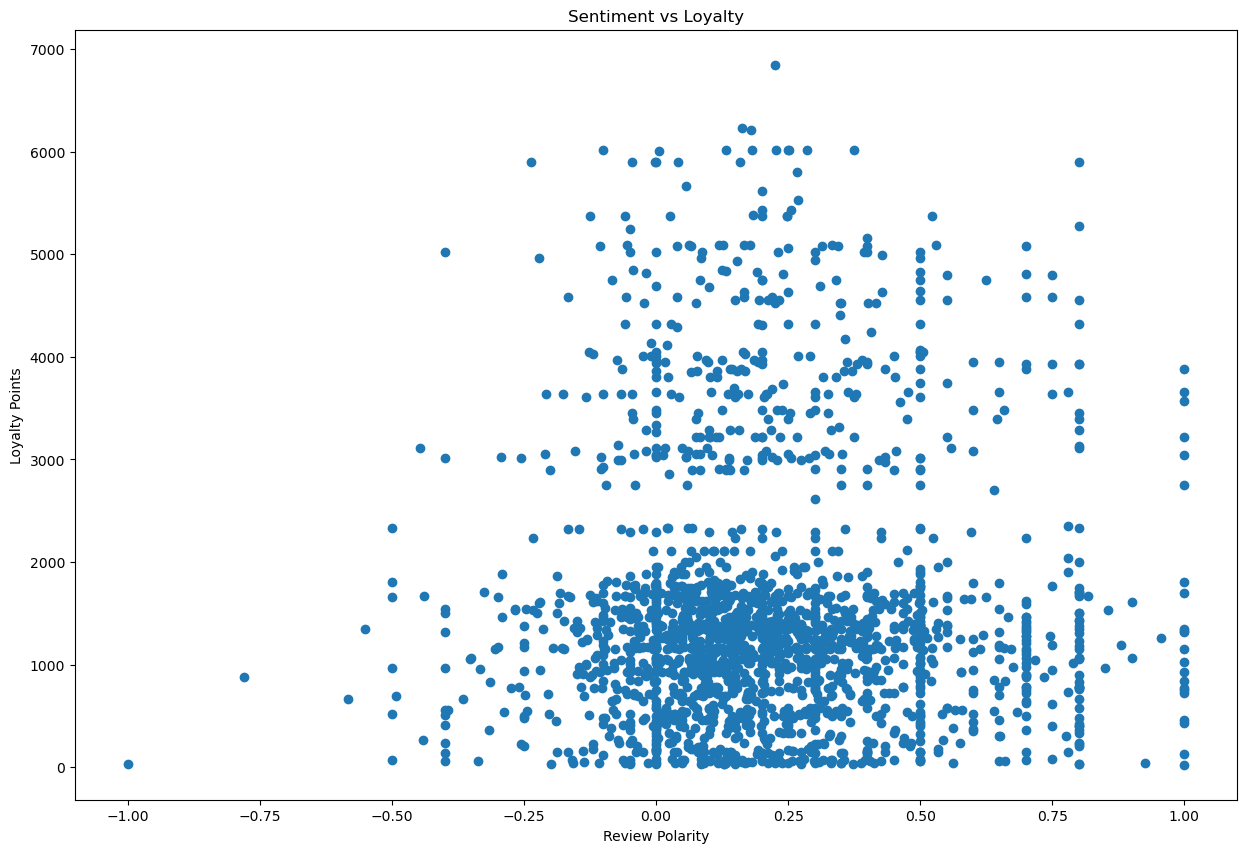

In [193]:
# Investigate correlation between sentiment score and loyalty points with a visual
import matplotlib.pyplot as plt

plt.scatter(reviews_edit['review_polarity'], reviews_edit['loyalty_points'])
plt.xlabel('Review Polarity')
plt.ylabel('Loyalty Points')
plt.title('Sentiment vs Loyalty')
plt.show()

In [194]:
# Calculate correlation coefficient for sentiment score and loyalty points (using Pearson correlation coefficient)
reviews_edit[['review_polarity', 'loyalty_points']].corr(method='pearson')

,review_polarity,loyalty_points
review_polarity,1.00,0.02
loyalty_points,0.02,1.00


In [195]:
# Calculate correlation coefficient for sentiment score and loyalty points (using Spearman rank correlation)
reviews_edit[['review_polarity', 'loyalty_points']].corr(method='spearman')

,review_polarity,loyalty_points
review_polarity,1.00e+00,3.98e-03
loyalty_points,3.98e-03,1.00e+00


### 8b) Customer cluster and sentiment score

In [196]:
# Group customers by cluster, showing mean sentiment score for each cluster.
mean_sentscore_by_cluster = reviews_edit.groupby('cluster_k5').agg({
    'remuneration': 'mean',
    'spending_score': 'mean',
    'review_polarity': 'mean',
    'cluster_k5': 'count'
}).rename(columns={'cluster_k5': 'cluster_size'})

mean_sentscore_by_cluster['segment_name'] = mean_sentscore_by_cluster.index.map(segment_names)

mean_sentscore_by_cluster

,remuneration,spending_score,review_polarity,cluster_size,segment_name
cluster_k5,,,,,
0,73.24,82.01,0.24,356,High-Value Engagers
1,44.42,49.53,0.21,774,Core Steady Spenders
2,74.83,17.42,0.23,330,Under-Engaged Affluent
3,20.35,79.42,0.22,269,Enthusiastic Value Buyers
4,20.42,19.76,0.20,271,"Low Engagement, Low Capacity"


### Observations and insights

a) do customers with higher loyalty points tend to have a more positive sentiment score? 
To test whether happier customers are also more loyal, review sentiment was compared with loyalty points. A scatter chart showed no relationship between these variables. Consistent with that, the Pearson correlation was 0.02 and the Spearman rank correlation was 0.004, indicating no meaningful relationship. This suggests loyalty is driven more by behavioural factors than by the sentiment about a specific product expressed in a customer review.

b) do customers in different clusters express different emotions?
Average sentiment polarity is broadly similar across all five customer clusters, with values in a fairly tight range between 0.20 and 0.24. This suggests that customers in different behavioural segments do not express meaningfully different emotions in their reviews.